# General functioning

Function get_insights(cube):
    Extracts and prints various characteristics of the data cube.
    Computes and prints dimension range (e.g. time, lat, lon), total size, layer size, gap size, and value range.

Function get_gap_heat_map(cube):
    Generates a heat map of value counts (non-NaN values) for dimension 1 and 2 (e.g. latitude/longitude pixel).

In [1]:
from ml4xcube.plotting import plot_slice
from xcube.core.store import new_data_store
from ml4xcube.insights import get_insights, get_gap_heat_map

In [2]:
# Define the variable name and the output path for the Zarr file
variable = "land_surface_temperature"
path     = "global_cube.zarr"

# Select the specified time range or another dimensional range you want to slice from the dataset containing gaps
data_store = new_data_store("s3", root="esdl-esdc-v2.1.1", storage_options=dict(anon=True))
dataset    = data_store.open_data("esdc-8d-0.083deg-184x270x270-2.1.1.zarr")
start_time = "2002-05-21"
end_time   = "2002-08-01"
ds         = dataset[variable].sel(time=slice(start_time, end_time), lon=slice(-170, -50), lat = slice(80, 10)).compute()


In [3]:
get_insights(ds, variable = variable, layer_dim = "time")

100%|████████████████████| 10/10 [00:00<00:00, 664.09it/s]
The data cube has the following characteristics:
 
Variable:                 land_surface_temperature
Shape:                    (time: 10, lat: 840, lon: 1440)
time range:               2002-05-21 - 2002-08-01
latitude range:           10.042 - 79.958
longitude range:          -169.958 - -50.042
Total size:               12,096,000
Size of each layer:       1,209,600
Total gap size:           7401271 -> 61 %
Maximum gap size:         73 % on 2002-06-06
Minimum gap size:         53 % on 2002-06-14
Value range:              223.20 - 339.18


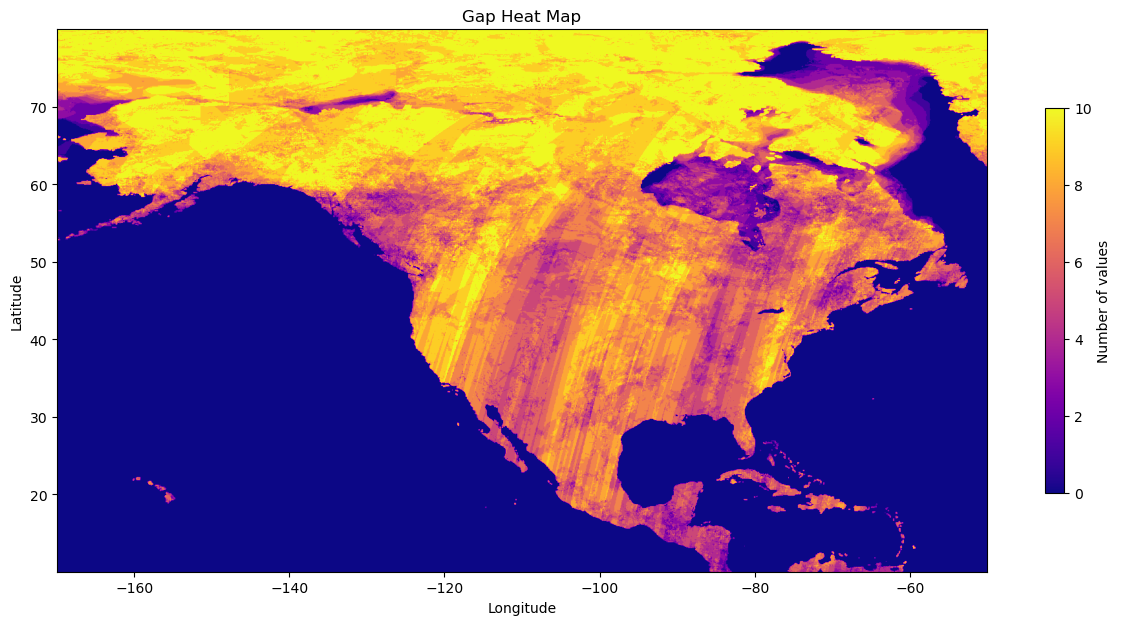

In [4]:
gap_count = get_gap_heat_map(ds, count_dim="time")
dataset   = gap_count.to_dataset(name=variable)

plot_slice(
    ds          = dataset,
    var_to_plot = variable,  # replace with your actual variable to plot
    color_map   = "plasma",
    title       = "Gap Heat Map",
    label       = "Number of values",
    xdim        = "lon",
    ydim        = "lat"
)